In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,nosql,javasript,css,azure,hadoop,mlops,flask,django,apache,data_mining
0,Risk Advisory Data Analytics Analyst,₹4L - ₹5L (Glassdoor Est.),job description\n\n\n\nwe are looking for cand...,4.0,KPMG\n4.0,Bengaluru,10000+ Employees,1987,Company - Private,Business Consulting,...,0,0,0,0,0,0,0,0,0,0
1,Data Analyst,₹3L - ₹3L (Glassdoor Est.),job description\n\n\nabout satsure\n\nsatsure ...,4.5,SatSure Analytics India\n4.5,Bengaluru,51 to 200 Employees,2017,Company - Private,Aerospace & Defence,...,0,0,0,0,0,0,0,0,0,1
2,Data Analyst,₹7L - ₹7L (Glassdoor Est.),target is an iconic brand a fortune company a...,4.3,TARGET\n4.3,Bengaluru,1001 to 5000 Employees,1962,Company - Public,General Merchandise & Superstores,...,0,0,0,0,0,0,0,0,0,0
3,Data Analyst,₹5L - ₹10L (Glassdoor Est.),about saltmine\n\n\n\n\nsaltmine is a rapidly ...,4.9,Saltmine\n4.9,Bengaluru,51 to 200 Employees,2017,Company - Private,Architectural & Engineering Services,...,0,0,0,0,0,0,0,0,0,0
4,Data Analyst,₹5L - ₹8L (Glassdoor Est.),aufgaben\n\neducation mastersbachelors in comp...,4.0,Mercedes-Benz Research and Development India P...,Bengaluru,5001 to 10000 Employees,1996,Company - Private,Information Technology Support Services,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['Job Description'][1]

'job description\n\n\nabout satsure\n\nsatsure is a deep tech decision intelligence company that works primarily at the nexus of agriculture infrastructure and climate action creating an impact for the other millions focusing on the developing world we want to make insights from earth observation data accessible to all\n\nwe are looking for a talented data analyst to join our team the ideal candidate should have experience in business intelligence tools like tableau and a strong passion for working with data to drive business decisions as a data analyst you will be responsible for analyzing large sets of data creating reports providing actionable insights and ensuring data quality\n\nif you are interested in working in an environment that focuses on the impact on society driven by cuttingedge technology and where you will have the freedom to work on innovative ideas and be creative with no hierarchies satsure is the place for you\n\nroles and responsibilities\n\ndata analysis analyze l

In [5]:
df['Job Title'].unique()

array(['Risk Advisory Data Analytics Analyst', 'Data Analyst',
       'Data Analytics - Analyst', 'Client Data Analyst',
       'Data Analyst, VP', 'Data Analyst & Scientist',
       'Business Operations Analyst Bangalore, Karnataka',
       'Data Management Analyst', 'Reporting Data Analyst',
       'eCommerce - Data Analyst', 'Business Analyst',
       'Product/Data Analyst', 'Data Support Analyst', 'HR Data Analyst',
       'Senior Product Analyst', 'Analyst',
       'Know Your Customer - Client Data Analyst',
       'GFCCP Technology Analyst', 'Data Informatics Analyst',
       'Data Analyst - Consumer Analytics', 'MIS & Data Analytics',
       'QM : Data Analytics',
       'Data Analyst - Member of Technical Staff Bangalore, Karnataka',
       'Data Analyst, BLR, Grp 4.4', 'Data Analyst-Python,Panda',
       'Data Analyst- Card Acquisition', 'Data Analyst - R&D',
       'Product Analyst', 'Data Analytics Associate- Card Acquisition',
       'Business Operations Analyst',
       'C

In [6]:
df['Type of ownership'].unique()

array(['Company - Private', 'Company - Public', '-1', 'Unknown',
       'Private Practice / Firm', 'Subsidiary or Business Segment',
       'Franchise', 'Non-profit Organisation', 'Self-employed',
       'Contract', 'College / University', 'Government'], dtype=object)

In [7]:
df['Type of ownership'].value_counts()

Company - Private                 683
Company - Public                  395
-1                                138
Private Practice / Firm            25
Unknown                            24
Non-profit Organisation            18
Subsidiary or Business Segment     15
Self-employed                       9
College / University                9
Government                          2
Franchise                           1
Contract                            1
Name: Type of ownership, dtype: int64

In [8]:
df['Size'].unique()

array(['10000+ Employees', '51 to 200 Employees',
       '1001 to 5000 Employees', '5001 to 10000 Employees', '-1',
       'Unknown', '501 to 1000 Employees', '201 to 500 Employees',
       '1 to 50 Employees'], dtype=object)

In [9]:
df['Size'] = df['Size'].apply(lambda x: x.replace('Employees', '').replace('Unknown','-1'))

In [10]:
df['Revenue'].unique()

array(['$10+ billion (USD)', 'Unknown / Non-Applicable',
       '$1 to $5 million (USD)', '$100 to $500 million (USD)',
       '$5 to $10 billion (USD)', '-1', '$5 to $25 million (USD)',
       '$25 to $50 million (USD)', 'Less than $1 million (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)'],
      dtype=object)

In [11]:
df['Revenue'] = df['Revenue'].apply(lambda x: x.replace('Unknown / Non-Applicable' , 'na'))

In [12]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower() or 'ml' in title.lower() or 'nlp' in title.lower()or 'ai' in title.lower() or 'deep learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def type_ownership(column):
    if 'private' in column.lower():
        return 'private'
    elif 'non-profit Organisation' in column.lower():
        return 'non-profit organisation'
    elif 'government' in column.lower():
        return 'government'
    elif 'subsidiary' in column.lower():
        return 'subsidiary'
    elif 'university' in column.lower():
        return 'university'
    elif 'self-employed' in column.lower():
        return 'self-employed'
    elif 'contract' in column.lower():
        return 'contract'
    elif 'public' in column.lower():
        return 'public'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [13]:
df['Job_simpler'] = df['Job Title'].apply(title_simplifier)

In [14]:
df['Type of ownership'] = df['Type of ownership'].apply(type_ownership)

In [15]:
df['Job_simpler'].value_counts()

analyst           634
data scientist    373
mle               197
na                100
manager            11
data engineer       5
Name: Job_simpler, dtype: int64

In [16]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        1096
senior     218
junior       6
Name: seniority, dtype: int64

In [17]:
df['Location'].value_counts()

Pune            230
Chennai         208
New Delhi       195
Hyderābād       195
Bengaluru       160
Mumbai          157
Ahmedabad        84
Vadodara         33
Surat            14
India             9
Navi Mumbai       7
Rājkot            7
Gāndhīnagar       6
Thāne             5
Secunderābād      2
Kalyan            1
Bharūch           1
Patel Nagar       1
Badarpur          1
Janakpuri         1
Pitampura         1
Daryā Ganj        1
Haveli            1
Name: Location, dtype: int64

In [18]:
india_records = df[df['Location'] == 'India']
india_records

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,css,azure,hadoop,mlops,flask,django,apache,data_mining,Job_simpler,seniority
317,Machine Learning Developer,Employer Provided Salary:₹4L - ₹8L,must have\n years of work experience\nsolid pr...,4.3,Spritle Software\n4.3,India,1 to 50,-1,private,Computer Hardware Development,...,0,0,0,0,0,1,0,0,mle,na
442,HR Analyst,Employer Provided Salary:₹15T - ₹35T,we are looking for a motivated and resultdrive...,-1.0,Hari Om Retail Pvt. Ltd.,India,-1,-1,na,-1,...,0,0,0,0,0,0,0,0,analyst,na
483,Senior Program Research Analyst – Modelling (E...,Employer Provided Salary:₹11L - ₹13L,senior program research analyst modelling ene...,3.7,WRI India\n3.7,India,1001 to 5000,1982,na,"Civic, Welfare & Social Services",...,0,0,0,0,0,0,0,0,analyst,senior
585,FP&A Analyst,Employer Provided Salary:₹8L - ₹10L,fpa analyst is responsible for timely and accu...,-1.0,ARCHER Transnational Systems Pvt Ltd,India,-1,-1,na,-1,...,0,0,0,0,0,0,0,0,analyst,na
610,Opening for Data analyst,Employer Provided Salary:₹3L - ₹5L,job title\n\n\nopening for data analyst\n\n\n\...,3.0,Jobuss Resources\n3.0,India,51 to 200,-1,private,-1,...,0,0,0,0,0,0,0,0,analyst,na
989,Analytics Manager,Employer Provided Salary:₹9L - ₹13L,educational qualification\n\nb tech in compute...,3.4,Larsen & Toubro Limited\n3.4,India,10000+,2014,public,Information Technology Support Services,...,0,0,0,0,0,0,0,0,manager,na
1029,Python Developer with Machine Learning & Artif...,Employer Provided Salary:₹4L,we are looking for a python developer who is p...,-1.0,Digital monks,India,-1,-1,na,-1,...,0,1,0,0,0,0,0,0,mle,na
1097,Market Research Analyst,Employer Provided Salary:₹3L - ₹8L,hours\n monday friday up to some hours outsi...,4.6,Valasys Media\n4.6,India,1 to 50,2014,private,Advertising & Public Relations,...,0,0,0,0,0,0,0,0,analyst,na
1104,Research Analyst,Employer Provided Salary:₹14T - ₹18T,job summary\nconducting market research by usi...,-1.0,KIA Business Solutions Pvt Ltd,India,-1,-1,na,-1,...,0,0,0,0,0,0,0,1,analyst,na


In [19]:
df.loc[df['Location'] == 'India', 'Location'] = 'Bengaluru'

In [20]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0        178
1       3252
2       3169
3       2570
4        487
        ... 
1315    2203
1316    1602
1317    1635
1318    1499
1319    1162
Name: desc_len, Length: 1320, dtype: int64

In [21]:
df = df.drop(df[df['hourly'] == 1].index)
df = df.drop('hourly', axis=1)

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'Company', 'Company_age', 'python', 'R',
       'spark', 'aws', 'excel', 'visualization', 'ml', 'database', 'pipelines',
       'cloud', 'security', 'sql', 'etl', 'html', 'nosql', 'javasript', 'css',
       'azure', 'hadoop', 'mlops', 'flask', 'django', 'apache', 'data_mining',
       'Job_simpler', 'seniority', 'desc_len'],
      dtype='object')

In [23]:
df.Company = df.Company.apply(lambda x: x.replace('\n', ''))
df.Company

0                                                    KPMG
1                                 SatSure Analytics India
2                                                  TARGET
3                                                Saltmine
4       Mercedes-Benz Research and Development India P...
                              ...                        
1315                                       LinkCxO Global
1316                                             Codvo.ai
1317                                             Neilsoft
1318                                              Calsoft
1319                       Serendipity Corporate Services
Name: Company, Length: 1314, dtype: object

In [24]:
df.describe()

,Rating,Founded,employer_provided,min_salary,max_salary,avg_salary,Company_age,python,R,spark,...,javasript,css,azure,hadoop,mlops,flask,django,apache,data_mining,desc_len
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.0,1314.000000,...,1314.0,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,3.210426,1177.660578,0.204718,4.797504,7.558813,6.178158,37.805175,0.475647,0.0,0.101979,...,0.0,0.019787,0.098935,0.055556,0.022831,0.013699,0.012177,0.015221,0.136986,2833.716134
std,1.878646,962.105494,0.403649,3.840489,4.455567,3.977344,66.885439,0.499597,0.0,0.302736,...,0.0,0.139320,0.298688,0.229149,0.149422,0.116281,0.109715,0.122476,0.343964,2024.172237
min,-1.000000,-1.000000,0.000000,0.240000,0.240000,0.240000,-1.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000
25%,3.400000,-1.000000,0.000000,3.000000,5.000000,4.500000,-1.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1403.250000
50%,3.900000,1870.000000,0.000000,4.000000,7.000000,5.500000,9.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2374.000000
75%,4.200000,2001.000000,0.000000,6.000000,9.000000,7.000000,30.000000,1.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3822.750000
max,5.000000,2021.000000,1.000000,50.000000,60.000000,55.000000,333.000000,1.000000,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12509.000000


<AxesSubplot:>

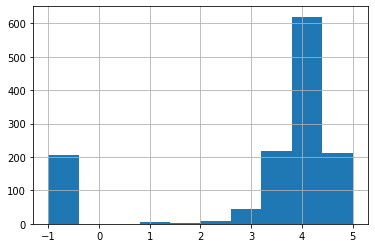

In [25]:
df.Rating.hist()

<AxesSubplot:>

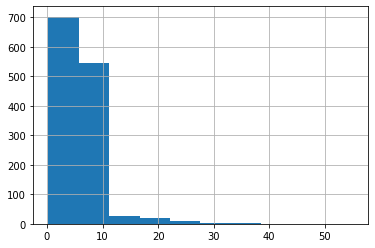

In [26]:
df.avg_salary.hist()

<AxesSubplot:>

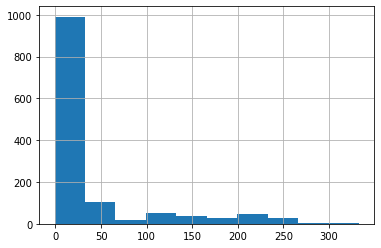

In [27]:
df.Company_age.hist()

<AxesSubplot:>

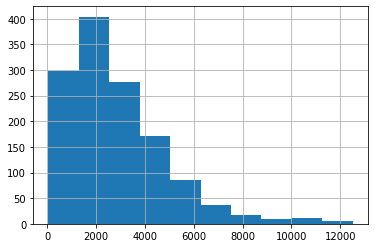

In [28]:
df.desc_len.hist()

<AxesSubplot:>

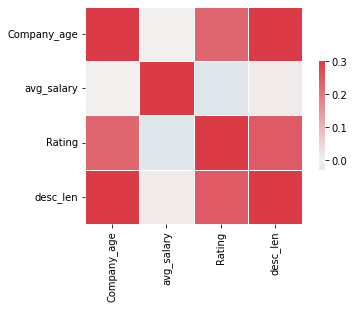

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['Company_age', 'avg_salary', 'Rating', 'desc_len']].corr(), vmax= 0.3,
           center = 0, cmap = cmap,square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'Company', 'Company_age', 'python', 'R',
       'spark', 'aws', 'excel', 'visualization', 'ml', 'database', 'pipelines',
       'cloud', 'security', 'sql', 'etl', 'html', 'nosql', 'javasript', 'css',
       'azure', 'hadoop', 'mlops', 'flask', 'django', 'apache', 'data_mining',
       'Job_simpler', 'seniority', 'desc_len'],
      dtype='object')

In [31]:
df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company','Job_simpler', 'seniority'
            ,'python','R','spark', 'aws', 'excel', 'visualization', 'ml', 'database', 'pipelines',
             'cloud', 'security', 'sql', 'etl', 'azure', 'hadoop', 'mlops', 'flask',
             'django', 'apache']]

Graph for Location: total = 22


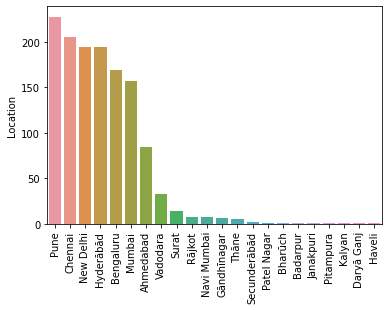

Graph for Size: total = 8


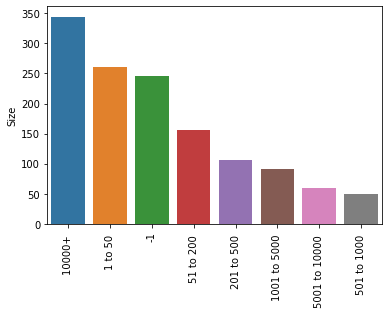

Graph for Type of ownership: total = 8


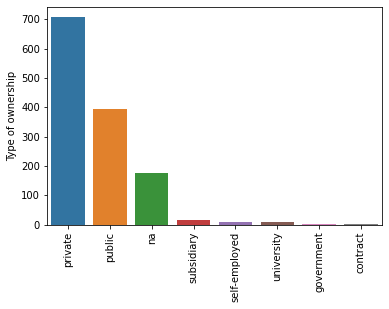

Graph for Industry: total = 52


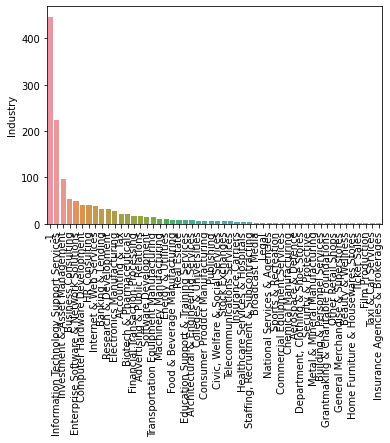

Graph for Sector: total = 23


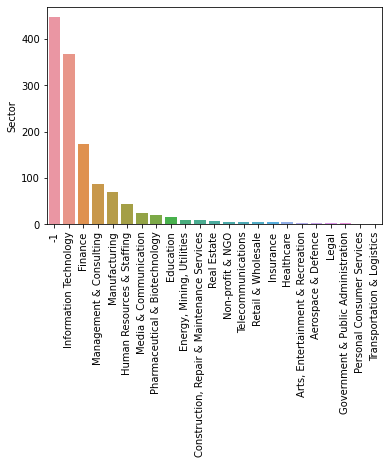

Graph for Revenue: total = 11


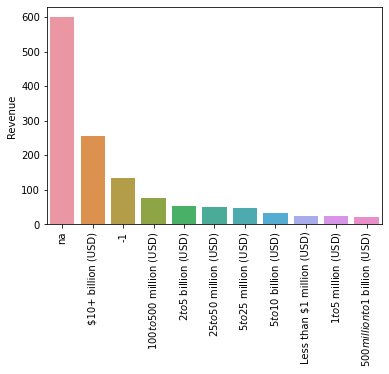

Graph for Company: total = 851


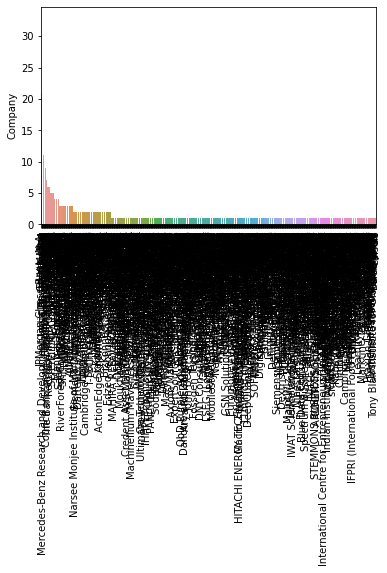

Graph for Job_simpler: total = 6


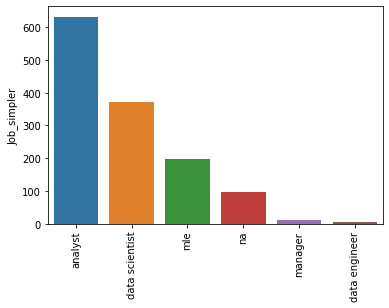

Graph for seniority: total = 3


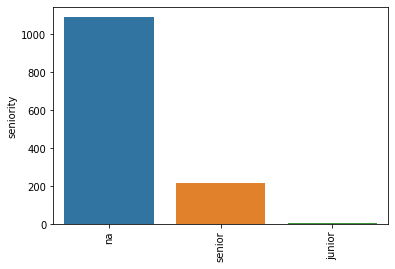

Graph for python: total = 2


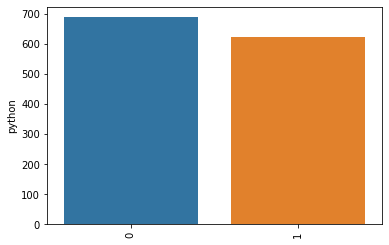

Graph for R: total = 1


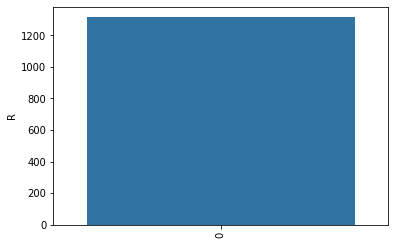

Graph for spark: total = 2


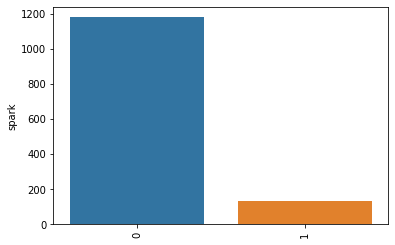

Graph for aws: total = 2


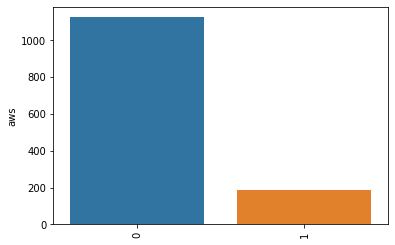

Graph for excel: total = 2


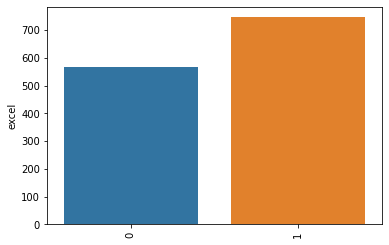

Graph for visualization: total = 2


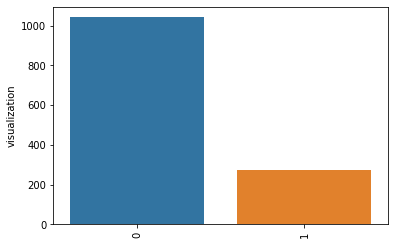

Graph for ml: total = 2


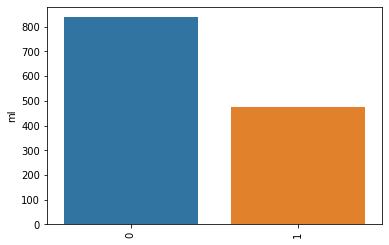

Graph for database: total = 2


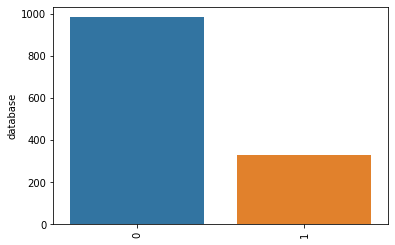

Graph for pipelines: total = 2


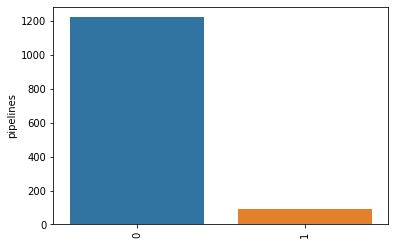

Graph for cloud: total = 2


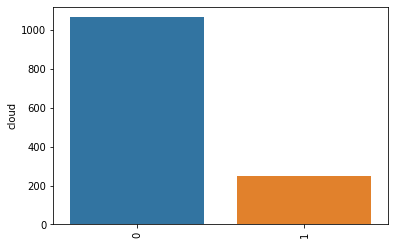

Graph for security: total = 2


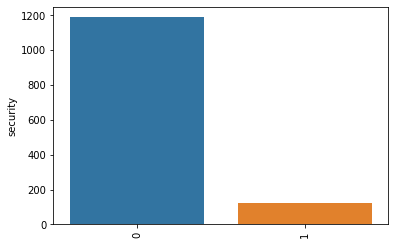

Graph for sql: total = 2


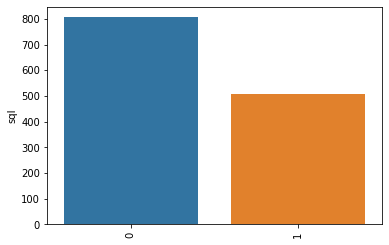

Graph for etl: total = 2


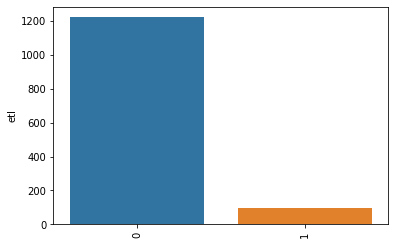

Graph for azure: total = 2


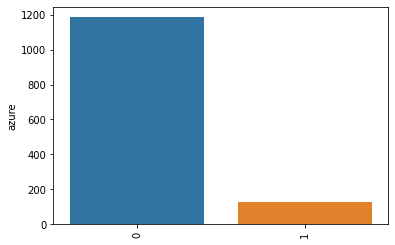

Graph for hadoop: total = 2


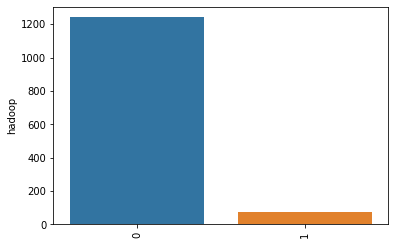

Graph for mlops: total = 2


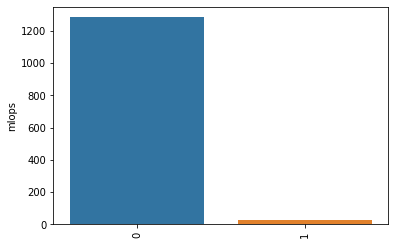

Graph for flask: total = 2


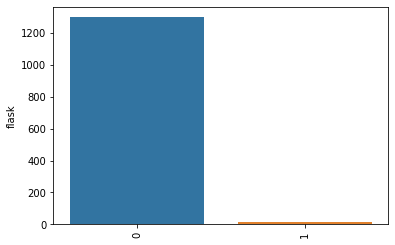

Graph for django: total = 2


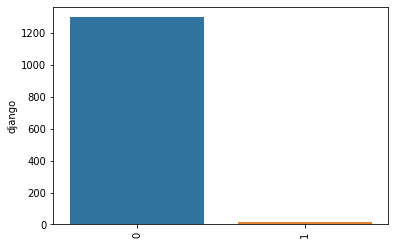

Graph for apache: total = 2


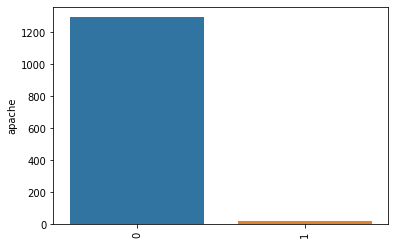

In [32]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f"Graph for {i}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Company: total = 20


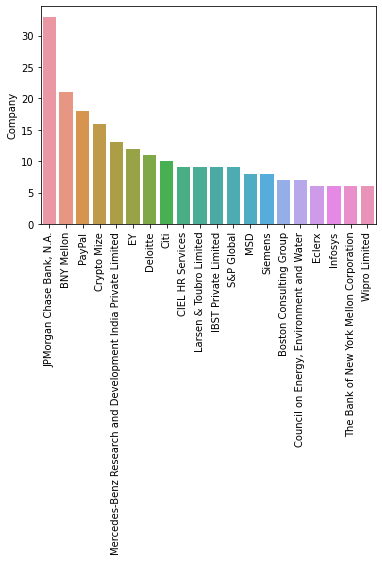

Graph for Industry: total = 20


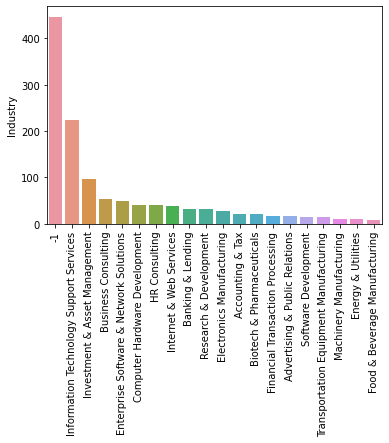

In [33]:
for i in df_cat[['Company', 'Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print(f"Graph for {i}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [34]:
pd.pivot_table(df, index = ['Job_simpler','seniority'], values = 'avg_salary')

avg_salary
Job_simpler    seniority            
analyst        junior       5.500000
               na           5.680901
               senior       6.671622
data engineer  na           7.700000
data scientist junior       4.833333
               na           6.870813
               senior       7.105882
manager        na           5.409091
mle            na           6.437468
               senior       5.749744
na             na           5.780769
               senior       5.090000

In [35]:
pd.pivot_table(df, index = ['Location'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
Bengaluru,6.743314
Hyderābād,6.568969
New Delhi,6.464021
Pune,6.375877
Navi Mumbai,6.265714
Mumbai,6.107643
Secunderābād,6.000000
Chennai,5.962718
Ahmedabad,5.076429


In [36]:
pd.pivot_table(df, index = ['Location','Job_simpler'], values = 'avg_salary').sort_values('Location')

avg_salary
Location  Job_simpler               
Ahmedabad analyst           4.669831
          data scientist    6.700000
          manager           5.500000
          mle               4.850000
          na                5.100000
...                              ...
Thāne     na                8.500000
Vadodara  analyst           4.085000
          data scientist    6.750000
          mle               4.500000
          na                8.700000

[63 rows x 1 columns]

In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'Company', 'Company_age', 'python', 'R',
       'spark', 'aws', 'excel', 'visualization', 'ml', 'database', 'pipelines',
       'cloud', 'security', 'sql', 'etl', 'html', 'nosql', 'javasript', 'css',
       'azure', 'hadoop', 'mlops', 'flask', 'django', 'apache', 'data_mining',
       'Job_simpler', 'seniority', 'desc_len'],
      dtype='object')

In [38]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'employer_provided', 'python', 'R',
       'spark', 'aws', 'excel', 'visualization', 'ml', 'database', 'pipelines',
       'cloud', 'security', 'sql', 'etl', 'azure', 'hadoop', 'mlops', 'flask',
       'django', 'apache', 'avg_salary']]

In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.2     10.500000
 3.1     10.333333
 3.3      7.194444
 5.0      7.116364
 1.0      6.716000
 4.2      6.712766
-1.0      6.444563
 3.9      6.344444
 3.7      6.331803
 3.4      6.289474
 4.1      6.274422
 3.2      6.230769
 4.5      6.221500
 4.0      5.993553
 4.3      5.724000
 3.0      5.718750
 4.4      5.696316
 3.6      5.669231
 3.8      5.641333
 2.8      5.500000
 1.9      5.500000
 4.6      5.404167
 3.5      5.404167
 4.8      5.313103
 4.9      5.266667
 2.3      5.250000
 2.0      5.000000
 2.9      4.571429
 2.1      4.500000
 4.7      4.231250
 2.7      4.112000
 2.5      3.500000
Industry
                                         avg_salary
Industry                                           
Department, Clothing & Shoe Stores        12.000000
Colleges & Universities                    9.071429
Transportation Equipment Manufacturing     7.500000
Beauty & Wellness                          7.500000
Research & Development    

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [40]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $5 million (USD),9,14
$10+ billion (USD),134,121
$100 to $500 million (USD),32,44
$2 to $5 billion (USD),24,28
$25 to $50 million (USD),24,27
$5 to $10 billion (USD),21,12
$5 to $25 million (USD),29,17
$500 million to $1 billion (USD),6,14
-1,96,38


In [ ]:
df.shape

In [ ]:
#df.to_csv('EDA_data.csv', index = False)